<a href="https://colab.research.google.com/github/prgmr99/deep_learning-pytorch-/blob/others/pandas_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Series**

일차원 데이터를 관리하는 자료구조. 

데이터와 함께 인덱스를 사용해서 데이터에 레이블을 달아둘 수 있다.

시리즈에서는 데이터에 맵핑되는 레이블을 인덱스라고 한다.

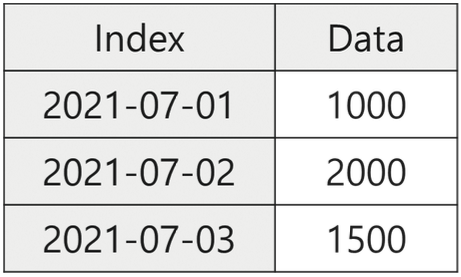

**numpy와 series의 차이**

시리즈를 사용하기 위해서는 먼저 Series 클래스를 import 해야한다.

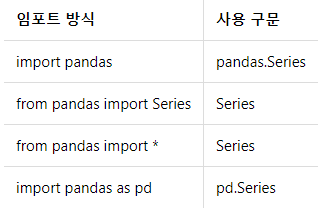

In [2]:
 # 시리즈 생성
 # 시리즈 객체를 생성하려면 데이터를 파이썬 리스트로 표현한 후 리스트 객체를 초기화자의 인자로 넘겨줘야 한다.

 from pandas import Series # Series를 사용하기 위해 모듈을 import한다.

 data=[10,20,30]  # 데이터를 파이썬 리스트로 저장한다.
 s=Series(data)   # 시리즈 객체를 생성한다. 이때 data라는 변수가 바인딩하는 파이썬 리스트가 초기화자의 인자로 전달된다. 생성된 시리즈 객체를 s라는 변수가 바인딩한다.
 print(s)

0    10
1    20
2    30
dtype: int64


In [3]:
# numpy를 이용해 시리즈를 생성할 수도 있다.
from pandas import Series
import numpy as np

data=np.arange(5)
s=Series(data)
print(s)
# dtype -> 데이터 타입, 64비트 정수가 시리즈에 저장돼있다.

0    0
1    1
2    2
3    3
4    4
dtype: int64


In [4]:
# 수치형 데이터뿐만 아니라 문자열 데이터도 저장할 수 있다.
data=['시가','고가']
s=Series(data)
print(s)

0    시가
1    고가
dtype: object


In [5]:
# object 타입의 시리즈는 브로드캐스팅 기능을 활용한 수치 연산을 사용할 수 없어서 시리즈의 효용성이 떨어진다. -> 같은 데이터 타입 사용 권장
s=Series(['SamSung', 81000])
print(s)

0    SamSung
1      81000
dtype: object


### 시리즈 인덱스

파이썬의 딕셔너리를 사용하면 데이터에 레이블을 붙여서 저장할 수 있는 것처럼

시리즈도 각 데이터에 인덱스를 설정할 수 있다.

인덱스에 설정을 하지 않으면, 0부터 시작하는 숫자 값을 RangeIndex 타입으로 생성한다.

In [6]:
from pandas import Series
data=[1000,2000,3000]
s=Series(data)
print(s.index)    # index라는 변수에는 구간 정보를 저장하는 자료구조 RangeIndex 객체가 들어있다. 0부터 2까지 1씩 증가하는 숫자가 들어있다고 알려준다.
print(s.index.to_list())   # index에 to_list 메서드를 호출하면, 파이썬 리스트로 값을 변환한다.

RangeIndex(start=0, stop=3, step=1)
[0, 1, 2]


In [7]:
# 시리즈 객체를 생성한 후에 인덱스를 수정할 수 있다.
# index라는 변수에 리스트/ndarray로 데이터를 전달하면 자동으로 맵핑된 RangeIndex가 제거되고 지정한 값으로 대체된다. 당연히 데이터와 같은 개수의 인덱스를 넣어야한다.
data=[1000,2000,3000]
s=Series(data)
s.index=["메로나","구구콘","하겐다즈"]
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


In [8]:
# 시리즈를 생성할 때 인덱스 같이 지정하기.
data=[1000,2000,3000]
index=["메로나","구구콘","하겐다즈"]

s=Series(data,index)  # 시리즈 객체를 생성할 때, 두 번째 인자로 리스트로 정의된 인덱스 값을 전달한다.
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


In [9]:
v = [ 1000, 2000, 3000 ]
k = ["메로나", "구구콘", "하겐다즈"]
s = Series(data=v, index=k)
print(s)

메로나     1000
구구콘     2000
하겐다즈    3000
dtype: int64


In [10]:
# reindex 메서드를 사용하여 인자로 전달한 새로운 값으로 맞춰 인덱스를 변경한다.
data = [1000, 2000, 3000]
index = ['메로나', '구구콘', '하겐다즈']
s = Series(data=data, index=index)
s2 = s.reindex(["메로나", "비비빅", "구구콘"])
print(s2)

# 비비빅은 존재하지 않아 결측값(NaN)으로 처리.
# NaN을 0으로 변경할 때는 fillna 메서드를 사용할 수 있다.

메로나    1000.0
비비빅       NaN
구구콘    2000.0
dtype: float64


In [11]:
print(s2.fillna(0))

메로나    1000.0
비비빅       0.0
구구콘    2000.0
dtype: float64


In [12]:
# reindex 메서드를 사용할 때 fill_value 파라미터를 사용해서 한 번에 처리할 수도 있다.
s2=s.reindex(["메로나", "비비빅", "구구콘"],fill_value=0)

In [13]:
# 예제1
price=[42500, 42550, 41800, 42550, 42650]
date = ["2019-05-31", "2019-05-30", "2019-05-29", "2019-05-28", "2019-05-27"]
s=Series(price,date)
print(s)

2019-05-31    42500
2019-05-30    42550
2019-05-29    41800
2019-05-28    42550
2019-05-27    42650
dtype: int64


In [14]:
# 딕셔너리를 사용해서 시리즈를 한 번에 만들 수도 있다.
data = {
    "2019-05-31" : 42500,
    "2019-05-30" : 42550,
    "2019-05-29" : 41800,
    "2019-05-28" : 42550,
    "2019-05-27" : 42650
}
s=Series(data)
print(s.index)
print(s.index.dtype)

# 시리즈의 index 변수에는 Index라는 객체 안에 날짜가 문자열로 저장돼 있습니다.
# Index 객체의 dtype에는 자료구조에 저장된 데이터 타입이 들어 있습니다. -> keys 저장돼있음.

Index(['2019-05-31', '2019-05-30', '2019-05-29', '2019-05-28', '2019-05-27'], dtype='object')
object


In [15]:
print(s.values)  # -> values도 확인 가능.

[42500 42550 41800 42550 42650]


### 시리즈 인덱싱

자료구조에서 하나의 값에 접근하는 것 = 인덱싱

리스트는 인덱스로만 인덱싱을 했다면

시리즈는 행 번호와 인덱스를 사용해서 인덱싱을 할 수 있다.

시리즈 객체는 생성될 때, 인덱스 이외에도 행 번호(row number)가 자동으로 부여된다. (눈에 보이지 않지만 내부적으로 부여되는 번호)

시리즈 객체의 행 번호를 사용해서 인덱싱할 때 **iloc 연산**(속성)을, 인덱스를 사용할 때 **loc연산**을 사용한다.

In [16]:
# iloc 연산 사용 -> 행 번호로 인덱싱 = 리스트의 정수 인덱싱, 양수/음수 모두 사용 가능
from pandas import Series

data=[1000,2000,3000]
s=Series(data=data)
print(s.iloc[0])
print(s.iloc[1])
print(s.iloc[2])
print(s.iloc[-1])

1000
2000
3000
3000


In [17]:
# loc 연산 사용 -> 시리즈의 인덱스 값을 통해 인덱싱
print(s.loc[0])
print(s.loc[1])
print(s.loc[2])
# print(s.loc[-1])  에러 발생 -> loc 연산은 시리즈의 인덱스 값을 통해 인덱싱한다.
# 하지만 s.loc[-1]은 -1이라는 인덱스가 시리즈 객체에 없으므로 에러 발생.

1000
2000
3000


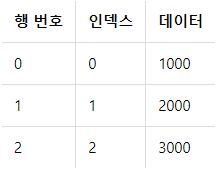

In [18]:
# 문자열 인덱스가 설정된 시리즈 객체에 대한 인덱싱
# 문자열 인덱스가 설정된 경우에도 loc 연산은 인덱스를 iloc는 행 번호를 사용한다.
data = [1000, 2000, 3000]
index = ["메로나", "구구콘", "하겐다즈"]
s = Series(data=data, index=index)
print(s.iloc[0])
print(s.loc['메로나'])

1000
1000


**왜 loc와 iloc, 두 가지 연산이 존재할까?**

 데이터를 인덱싱할 때 loc를 사용하는 경우가 더 편리한 경우도 있고 반대로 iloc를 사용하는 경우가 더 편리한 경우도 있기 때문

 시리즈 객체에서 가장 마지막에 위치하는 데이터를 인덱싱하는 경우 해당 인덱스를 모르더라도 행 번호를 사용하는 iloc[-1]을 사용해서 쉽게 마지막 데이터를 가져올 수 있다.

 예)

 어떤 종목의 1월 종가 데이터가 시리즈로 표현되어 있을 때 첫 거래일의 데이터를 가져와야 하는 경우를 생각해봅시다.

 1월의 첫 거래일은 휴일에 따라 다르기 때문에 항상 1월 2일이 아닙니다. 이런 상황에서는 휴일 정보를 확인하고 첫 번째 거래일을 얻을 수 있는 loc 연산보다는 iloc[0]으로 데이터를 얻어오는 것이 편리하겠죠?

In [19]:
# 시리즈 객체는 loc와 iloc라는 연산 이외에도 인덱싱 기호'[]'만을 사용해서 인덱싱 할 수 있다.
print(s['메로나'])
print(s[0])

1000
1000


In [20]:
# 하지만 시리즈 객체의 인덱싱에서 [] 기호는 조심해야 한다.
# 기본적으로 [] 기호는 내부적으로 loc 메서드를 호출한다.
s1 = Series([10, 20, 30])
s2 = Series([10, 20, 30], index=[1, 2, 3])
print(s1[0])   # 시리즈 객체 s1은 인덱스를 설정하지 않았으므로 RangeIndex 타입 인덱스가 자동으로 부여된 상태. 인덱스 0을 통해 값 10 출력.
# print(s2[0])   # 시리즈 객체 s2는 인덱스가 1,2,3이 각각 맵핑되었으며, 인덱스 0은 없어 에러가 발생한다.

10


위 예제와 달리 문자열 인덱스가 사용된 것을 알 수 있습니다. 

[ ]를 사용해 인덱싱하면 loc 연산처럼 동작한다고 설명했습니다. 

그렇다면 s3 객체에는 인덱스 0이 존재하지 않으므로 에러가 발생해야 할 것 같지만 10이라는 값이 출력됩니다. 

**시리즈 객체의 내부 구현에 있어서 인덱스의 타입이 정수가 아닌 경우에는 정수와 함께 [ ] 인덱싱을 사용하면 iloc 연산처럼 동작하기 때문입니다.**

In [21]:
s3 = Series([10, 20, 30], index=['a', 'b', 'c'])
print(s3[0])

10


In [22]:
# iloc 연산처럼 동작하기 때문에 아래도 성립
print(s3.index[ 0 ])
print(s3.index[ -1 ])

a
c


### 시리즈 슬라이싱

 

시리즈 개게도 슬라이싱을 할 수 있다.

iloc나 loc 연산 또는 [ ] 기호를 사용한다.

iloc[시작 행 번호: 끝 행 번호]와 같이 시작과 끝으로 사용할 두 개의 행 번호를 입력한다.

In [23]:
from pandas import Series
data=[1000,2000,3000]
index=['메로나', '구구콘','하겐다즈']
s=Series(data=data,index=index)
print(s.iloc[0:2])

메로나    1000
구구콘    2000
dtype: int64


In [25]:
# 시리즈 객체는 파이썬 리스트와 달리 연속적이지 않은 값들에 대해서도 슬라이싱 가능.
data = [1000, 2000, 3000]
index = ["메로나", "구구콘", "하겐다즈"]
s = Series(data=data, index=index)
 
indice = [0, 2]  # 행 번호를 의미하는 0번과 2번을 리스트로 저장한다.
print(s.iloc[ indice ])  # 리스트에는 인덱스가 저장돼 있으므로 iloc로 슬라이싱한다.
print(s.iloc[ [0, 2] ])

메로나     1000
하겐다즈    3000
dtype: int64
메로나     1000
하겐다즈    3000
dtype: int64


In [30]:
data = [1000, 2000, 3000]
index = ["메로나", "구구콘", "하겐다즈"]
s = Series(data=data, index=index)

indice = ["메로나", "하겐다즈"]
print(s.loc[ indice ])
print(s.loc[ ["메로나", "하겐다즈"] ])
# loc을 사용해서 불연속적인 데이터를 슬라이싱 가능.
# 리스트에 문자열 인덱스를 저장하고 loc 연산으로 슬라이싱
# loc 자리에 iloc을 사용하면 에러 발생 -> iloc은 정수형 인덱스만 처리 가능하다.

메로나     1000
하겐다즈    3000
dtype: int64
메로나     1000
하겐다즈    3000
dtype: int64


### 시리즈 수정/추가/삭제

시리즈 객체의 값을 수정, 추가, 삭제해보겠다.
시리즈의 수정은 loc 혹은 iloc으로 특정 위치에 접근한 뒤 변경할 값을 넣어주면 된다.


In [34]:
from pandas import Series
data=[1000,2000,3000]
index=["메로나","구구콘","하겐다즈"]
s=Series(data=data,index=index)
s.loc["메로나"]=500  # s.iloc[0]=500
print(s)
# iloc 연산을 사용하거나 [ ]기호를 사용해서 메로나의 가격을 수정했다.

메로나      500
구구콘     2000
하겐다즈    3000
dtype: int64


In [35]:
# 시리즈에서 값의 삭제는 drop 메서드를 사용한다.
# drop 메서드의 인자로 인덱스를 넣어주면 해당 인덱스의 값이 삭제된다.
print(s.drop('메로나'))
# print(s.drop(0))  에러 발생
# drop 메서드는 시리즈의 인덱스를 사용해야 한다.

구구콘     2000
하겐다즈    3000
dtype: int64


In [36]:
# 시리즈의 인덱스가 존재하지 않으면 새로운 값이 추가된다.
s.loc['비비빅']=600
print(s)

메로나      500
구구콘     2000
하겐다즈    3000
비비빅      600
dtype: int64


In [37]:
# drop 메서드는 시리즈의 원본 데이터를 제거하지 않고 새로운 시리즈 객체를 반환하는 것에 유의해야 한다.
# 그렇기 때문에 위에 결과에서 볼 수 있듯, 메로나가 있는 것을 확인할 수 있다.
# 이는 실수로 원본 데이터를 수정해버리는 것을 방지하기 위한 일종의 안전장치이다.
# 원본도 수정하고 싶다면 다음과 같이 작성하면 된다.
s=s.drop('메로나')
print(s)

구구콘     2000
하겐다즈    3000
비비빅      600
dtype: int64


In [39]:
print(s) # 원본이 변경된 것을 확인할 수 있다.

구구콘     2000
하겐다즈    3000
비비빅      600
dtype: int64


### 시리즈 연산

시리즈는 numpy와 동일하게 broadcasting이 적용되며, 같은 인덱스를 갖는 데이터끼리 연산을 수행한다.

In [40]:
from pandas import Series

In [42]:
철수=Series([10,20,30], index=['Naver','SK','KT'])
영희=Series([10,20,30], index=['SK','KT',"Naver"])
가족=철수+영희
print(가족)

# 출력 결과를 보면, 데이터의 위치에 관계없이 같은 인덱스를 갖는 종목끼리 연산을 수행하는 것을 확인할 수 있다.

KT       50
Naver    40
SK       30
dtype: int64


In [43]:
print(철수*10)

Naver    100
SK       200
KT       300
dtype: int64


In [45]:
high = Series([42800, 42700, 42050, 42950, 43000])
low = Series([42150, 42150, 41300, 42150, 42350])

diff = high - low
print(diff)
# high와 low에 인덱스를 지정하지 않았기 때문에 자동으로 맵핑된 정수 인덱스가 사용됐다.

0    650
1    550
2    750
3    800
4    650
dtype: int64


In [47]:
# numpy에서 사용했던 함수와 메서드를 대부분 시리즈에서 사용할 수 있다.
print(diff.max())

# python 내장함수 max를 사용해도 되지만 시리즈 객체를 다룰 때는 호환성이 좋은 
# max 메서드를 사용하는 것이 좋다.

800


In [48]:
date = ["6/1", "6/2", "6/3", "6/4", "6/5"]
high = Series([42800, 42700, 42050, 42950, 43000], index=date)
low = Series([42150, 42150, 41300, 42150, 42350] , index=date)
diff = high - low
print(diff)

6/1    650
6/2    550
6/3    750
6/4    800
6/5    650
dtype: int64


In [52]:
# 시리즈는 자료구조이므로 반복문을 사용할 수 있다.
max_idx=0
max_val=0

for i in range(len(diff)):
  if diff[i]>max_val:
    max_val=diff[i]
    max_idx=i
  
print(max_idx)
print(diff.index[max_idx])
print(max_val)

3
6/4
800


In [54]:
# 시리즈는 최댓값일 때의 인덱스를 반환하는 idxmax와 최솟값일 때의 인덱스를 반환하는 idxmin 메서드를 제공한다
print(diff.idxmax())
print(diff.idxmin())

6/4
6/2


In [55]:
date = ["6/1", "6/2", "6/3", "6/4", "6/5"]
high = Series([42800, 42700, 42050, 42950, 43000], index=date)
low = Series([42150, 42150, 41300, 42150, 42350] , index=date)
profit = high / low
print(profit)

6/1    1.015421
6/2    1.013049
6/3    1.018160
6/4    1.018980
6/5    1.015348
dtype: float64


In [57]:
# 누적 수익률 -> 모든 수익률을 누적해서 곱함으로써 계산 가능.
# 판다스에서 제공하는 cumprod 메서드를 사용하면 한 번에 결과를 얻을 수 있다.
print(profit.cumprod())

6/1    1.015421
6/2    1.028671
6/3    1.047351
6/4    1.067230
6/5    1.083610
dtype: float64


In [60]:
# cumprod 메서드를 적용한 결과가 다시 시리즈이니 인덱싱으로 하나의 값을 가져올 수 있다.
print(profit.cumprod().iloc[-1]) # ()을 [] 대신 쓰면 에러 발생.

1.0836101509172456


In [61]:
data = {
    "삼성전자": "전기,전자",
    "LG전자": "전기,전자",
    "현대차": "운수장비",
    "NAVER": "서비스업",
    "카카오": "서비스업"
}
s = Series(data)

In [63]:
# 위 5개 종목에서 중복을 제거하고 업종 리스트를 가져오고 싶을 때 unique 메서드 사용
# unique 메서드는 다음과 같이 시리즈의 values 중 유일한 값들을 ndarray로 반환
print(s.unique())

['전기,전자' '운수장비' '서비스업']


In [65]:
# value_counts 메서드를 사용하면 값의 출현 빈도를 계산해서 시리즈 객체로 반환
s.value_counts()

전기,전자    2
서비스업     2
운수장비     1
dtype: int64

### 시리즈와 Map

시리즈를 사용하다 보면 시리즈가 지원하는 기본 연산 이외에도 복잡한 형태의 사용자 정의 코드를 적용하고 싶을 때가 있다.

예를 들어, 숫자가 문자열 타입으로 시리즈에 바인딩 되어 있을 때, 이를 숫자로 변환하는 경우.

형 변환 함수를 바로 사용하면 콤마로 인해 형 변환을 실패해서 에러가 출력된다.

In [66]:
from pandas import Series

In [68]:
s=Series(['1,234','5,678','9,876'])
# print(int(s)) 에러 발생

In [70]:
# 파이썬이 제공하지 않는 기능을 시리즈에 적용할 때는 map 메서드를 사용.
def remove_comma(x):
  print(x,'in function')
  return x

s= Series(['1,234','5,678','9,876'])
result=s.map(remove_comma) # map 메서드에 remove_comma 함수 입력.
# remove_comma 함수를 호출하는 것이 아니라 함수의 이름만 map 메서드로 연결한 것 주의.
print(result)

1,234 in function
5,678 in function
9,876 in function
0    1,234
1    5,678
2    9,876
dtype: object


In [71]:
# remove_comma 함수를 수정하여 콤마를 제거하고 숫자로 타입 변경하기
def remove_comma(x):
  return int(x.replace(",",""))

s=Series(['1,234','5,678','9,876'])
result=s.map(remove_comma)
print(result)

0    1234
1    5678
2    9876
dtype: int64


In [72]:
s= Series(["e",'w','g'], index=[0,2,4])

In [74]:
print(s)

0    e
2    w
4    g
dtype: object


In [76]:
# map 메서드를 사용해서 수치형 데이터를 볌주형 데이터로 구분해보자.
# 바인딩된 값이 5000보다 크면 '크다', 그렇지 않으면 '작다'로 분류
def is_greater_than_5000(x):
  if x>5000:
    return '크다'
  else:
    return '작다'

s=Series([1234,5678,9876])
s=s.map(is_greater_than_5000)
print(s)

0    작다
1    크다
2    크다
dtype: object


### 시리즈 필터링

시리즈 객체에 비교 연산 적용.

In [77]:
from pandas import Series
data = [42500, 42550, 41800, 42550, 42650]
index = ['2019-05-31', '2019-05-30', '2019-05-29', '2019-05-28', '2019-05-27']
s = Series(data=data, index=index)
cond = s > 42000
print(cond)

2019-05-31     True
2019-05-30     True
2019-05-29    False
2019-05-28     True
2019-05-27     True
dtype: bool


In [79]:
# cond라는 변수에는 True 또는 False가 시리즈로 저장되어 있다.
# 이를 사용해 색인하는 것 = '불리언 인덱싱(색인)' -> 시리즈 객체서 매우 유용한 기능 중 하나.
# 종가가 42,000원 이상인 거래일만 출력해야 하는 경우.
# 이 경우 시리즈 객체의 대괄호([]) 연산자에 True 또는 False가 저장된 시리즈 객체를 넘겨주면 끝!
print(s[cond])

2019-05-31    42500
2019-05-30    42550
2019-05-28    42550
2019-05-27    42650
dtype: int64


In [80]:
close = [42500, 42550, 41800, 42550, 42650]
open = [42600, 42200, 41850, 42550, 42500]
index = ['2019-05-31', '2019-05-30', '2019-05-29', '2019-05-28', '2019-05-27']

open = Series(data=open, index=index)
close = Series(data=close, index=index)

cond = close > open
print(cond)

2019-05-31    False
2019-05-30     True
2019-05-29    False
2019-05-28    False
2019-05-27     True
dtype: bool


In [81]:
# 종가가 시가보다 높았던 상승 마감한 날의 종가를 출력하려면 어떻게 해야 할까?
cond=close>open
print(close[cond])

2019-05-30    42550
2019-05-27    42650
dtype: int64


In [82]:
# 코드가 간략하게 변수를 사용하지 않고 한 줄로 짧게 표현할 수 있다.
print(close[close>open])

2019-05-30    42550
2019-05-27    42650
dtype: int64


In [83]:
close = [42500, 42550, 41800, 42550, 42650]
open = [42600, 42200, 41850, 42550, 42500]
index = ['2019-05-31', '2019-05-30', '2019-05-29', '2019-05-28', '2019-05-27']

open = Series(data=open, index=index)
close = Series(data=close, index=index)
diff = close - open
print(diff[close > open])

2019-05-30    350
2019-05-27    150
dtype: int64


In [84]:
print(diff)

2019-05-31   -100
2019-05-30    350
2019-05-29    -50
2019-05-28      0
2019-05-27    150
dtype: int64


In [85]:
print(diff[close<=open])

2019-05-31   -100
2019-05-29    -50
2019-05-28      0
dtype: int64


In [86]:
# close와 open 시리즈 객체는 인덱스가 같기 때문에 조건 비교/필터링을 할 수 있었다.
# 만약, 두 시리즈의 인덱스가 다르다면, 인덱스를 기반으로 연산하는 시리즈의 특성상 
# 연산이 제대로 적용X

### 정렬 및 순위

In [87]:
# 시리즈 객체는 sort_values라는 자체 정렬 메서드를 갖는다.
# 기본적으로 오름차순으로 정렬
# 내림차순 -> ascending=False 로 함수 기본 인자 설정.
from pandas import Series
 
data = [3.1, 2.0, 10.1, 5.1]
index = ['000010', '000020', '000030', '000040']
s = Series(data=data, index=index)
print(s)

# 정렬 (오름차순)
s1 = s.sort_values()
print(s1)

# 정렬 (내림차순)
s2 = s.sort_values(ascending=False)
print(s2)

000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64
000020     2.0
000010     3.1
000040     5.1
000030    10.1
dtype: float64
000030    10.1
000040     5.1
000010     3.1
000020     2.0
dtype: float64


In [89]:
# 순위 매기기.
# rank 메서드 사용.
# rank 메서드는 기본적으로 값이 작은 데이터를 1순위로 지정한다.
data = [3.1, 2.0, 10.1, 3.1]
index = ['000010', '000020', '000030', '000040']
s = Series(data=data, index=index)
print(s.rank())

000010    2.5
000020    1.0
000030    4.0
000040    2.5
dtype: float64


In [90]:
# 값이 큰 데이터를 1등으로 순위를 매기려면 rank 메서드를 호출할 때 ascending=False 옵션 설정.